In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import os

plt.rcParams['figure.figsize'] = [12, 8]
plt.style.use('ggplot')

In [2]:
data_sizes = {}

for directory in os.listdir("data"):
    data_sizes[directory] = len(os.listdir("data/"+directory))

data_sizes

{'adam': 100, 'momentum': 100, 'nesterov': 100, 'rmsprop': 100, 'sgd': 100}

In [3]:
pd_dict = {}

for key in data_sizes:
    pd_dict[key] = [pd.read_csv("data/"+key+"/" + i + ".csv") for i in map(str, range(0, data_sizes[key]))]

In [4]:
pd_dict_mean = {}
pd_dict_var = {}

for key in pd_dict:
    pd_dict_mean[key] = pd.concat(pd_dict[key]).groupby(level=0).mean()
    pd_dict_var[key] = pd.concat(pd_dict[key]).groupby(level=0).var()

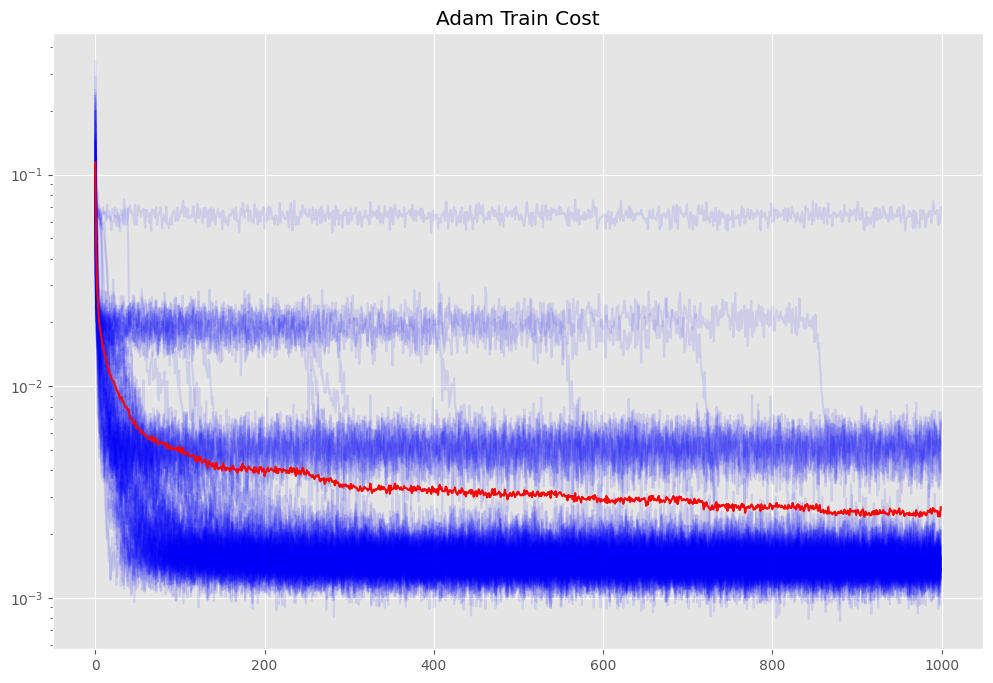

In [5]:
plt.yscale("log")
plt.title("Adam Train Cost")
for i in range(data_sizes["adam"]):
    plt.plot(pd_dict["adam"][i]["TrainCost"], color="blue", alpha=0.1)

plt.plot(pd_dict_mean["adam"]["TrainCost"], color="red");

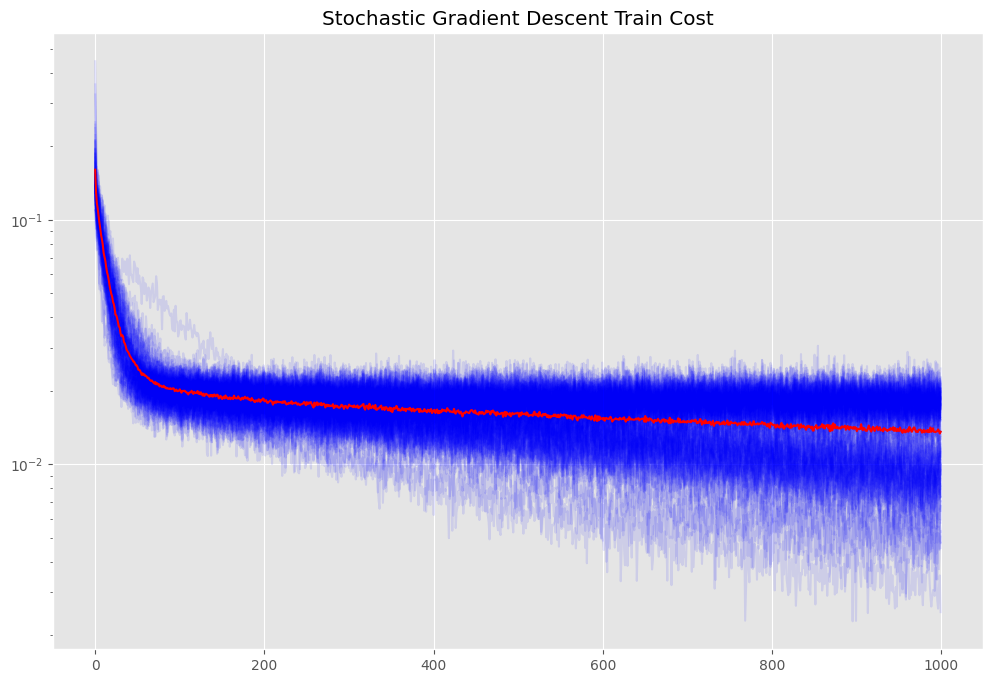

In [6]:
plt.yscale("log")
plt.title("Stochastic Gradient Descent Train Cost")
for i in range(data_sizes["sgd"]):
    plt.plot(pd_dict["sgd"][i]["TrainCost"], color="blue", alpha=0.1)

plt.plot(pd_dict_mean["sgd"]["TrainCost"], color="red");

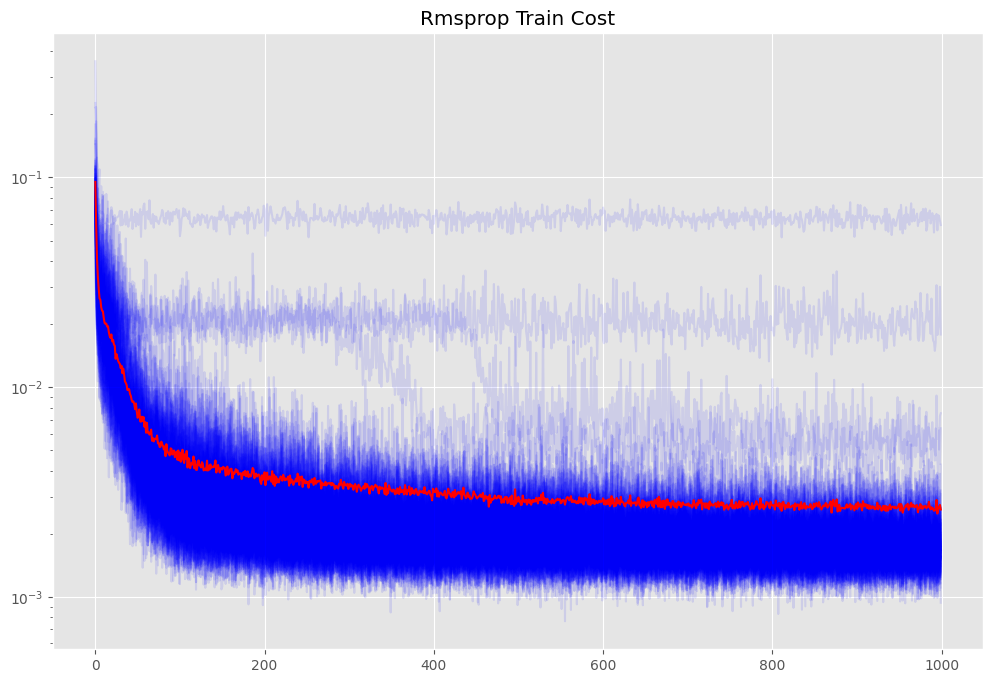

In [7]:
plt.yscale("log")
plt.title("Rmsprop Train Cost")
for i in range(data_sizes["rmsprop"]):
    plt.plot(pd_dict["rmsprop"][i]["TrainCost"], color="blue", alpha=0.1)

plt.plot(pd_dict_mean["rmsprop"]["TrainCost"], color="red");

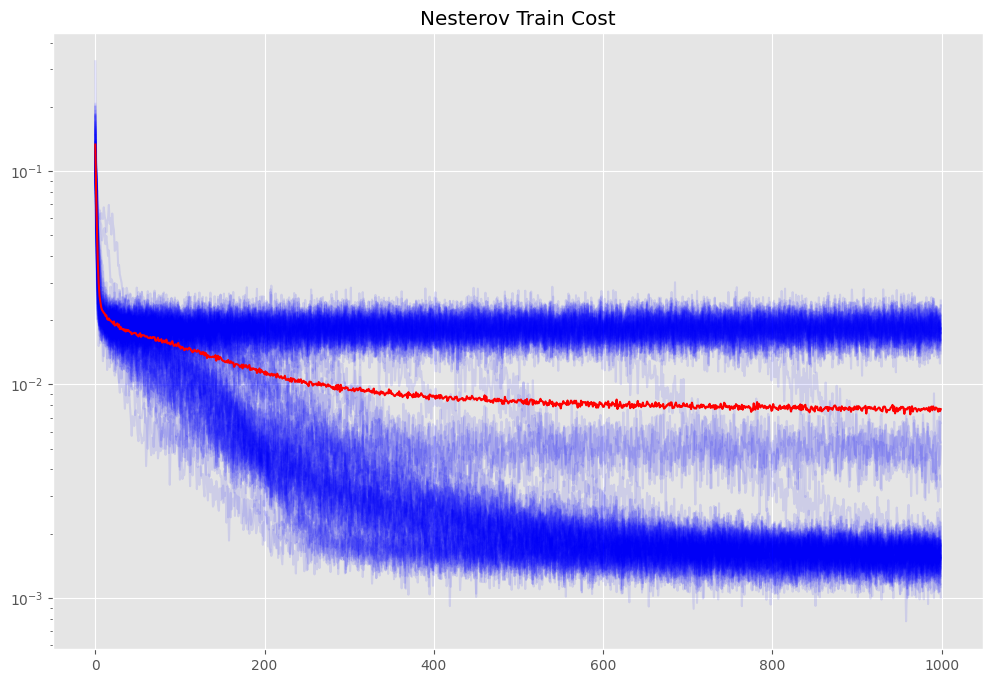

In [8]:
plt.yscale("log")
plt.title("Nesterov Train Cost")
for i in range(data_sizes["nesterov"]):
    plt.plot(pd_dict["nesterov"][i]["TrainCost"], color="blue", alpha=0.1)

plt.plot(pd_dict_mean["nesterov"]["TrainCost"], color="red");

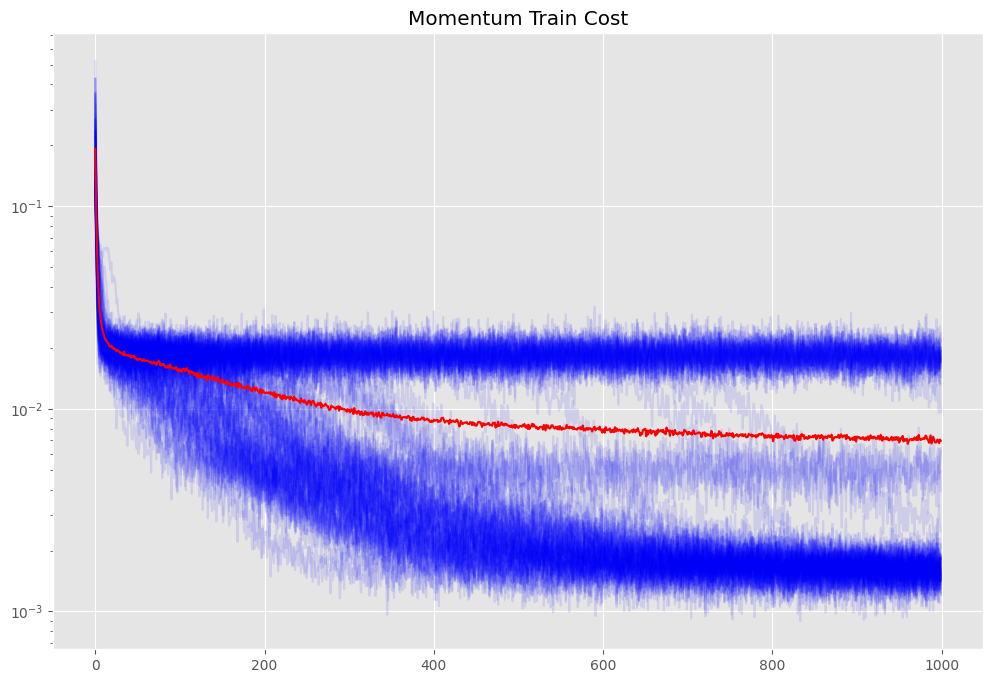

In [9]:
plt.yscale("log")
plt.title("Momentum Train Cost")
for i in range(data_sizes["momentum"]):
    plt.plot(pd_dict["momentum"][i]["TrainCost"], color="blue", alpha=0.1)

plt.plot(pd_dict_mean["momentum"]["TrainCost"], color="red");

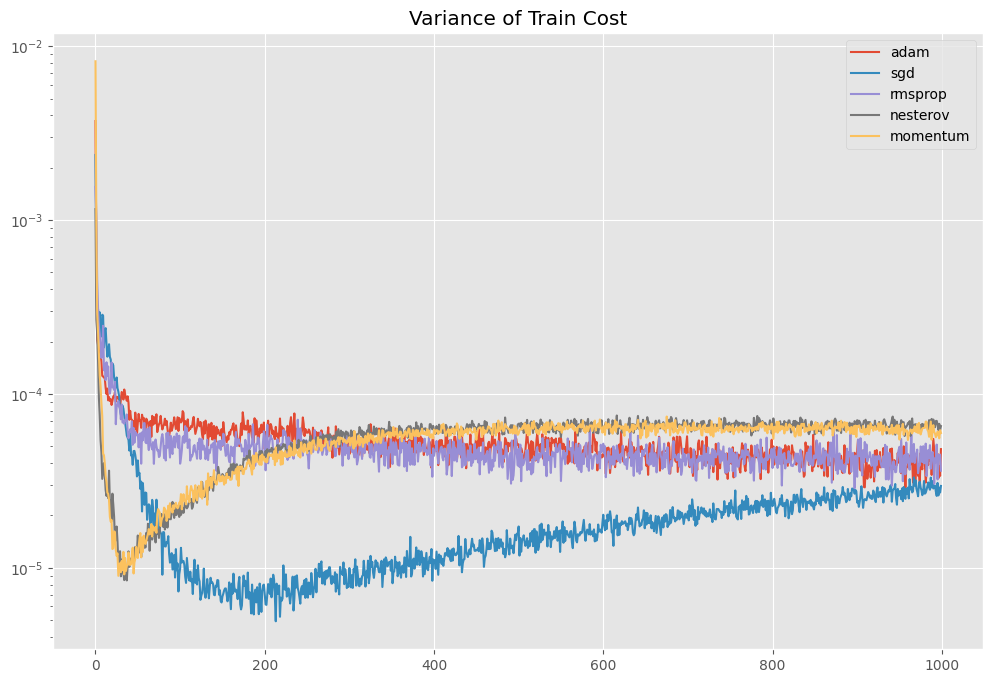

In [10]:
plt.yscale("log")

plt.title("Variance of Train Cost")

plt.plot(pd_dict_var["adam"]["TrainCost"], label="adam")
plt.plot(pd_dict_var["sgd"]["TrainCost"], label="sgd")
plt.plot(pd_dict_var["rmsprop"]["TrainCost"], label="rmsprop")
plt.plot(pd_dict_var["nesterov"]["TrainCost"], label="nesterov")
plt.plot(pd_dict_var["momentum"]["TrainCost"], label="momentum")

plt.legend();

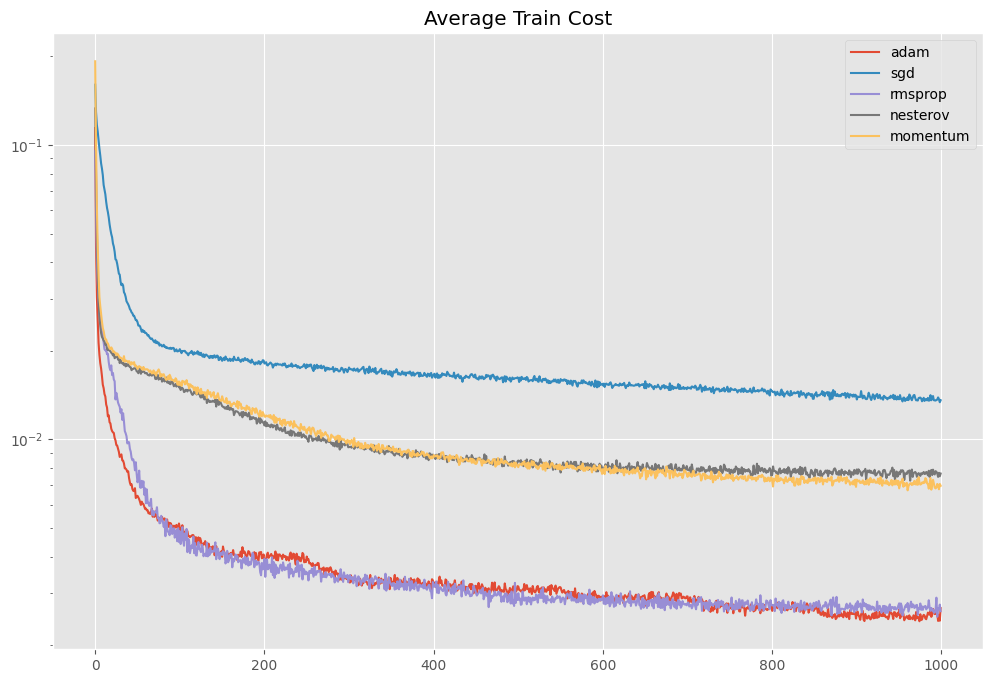

In [11]:
plt.yscale("log")

plt.title("Average Train Cost")

plt.plot(pd_dict_mean["adam"]["TrainCost"], label="adam")
plt.plot(pd_dict_mean["sgd"]["TrainCost"], label="sgd")
plt.plot(pd_dict_mean["rmsprop"]["TrainCost"], label="rmsprop")
plt.plot(pd_dict_mean["nesterov"]["TrainCost"], label="nesterov")
plt.plot(pd_dict_mean["momentum"]["TrainCost"], label="momentum")

plt.legend();

In [12]:
min_max_dict = {}

for key in pd_dict:
    min_max_dict[key] = pd.concat(pd_dict[key]).groupby(level=0).agg([np.min, np.max])

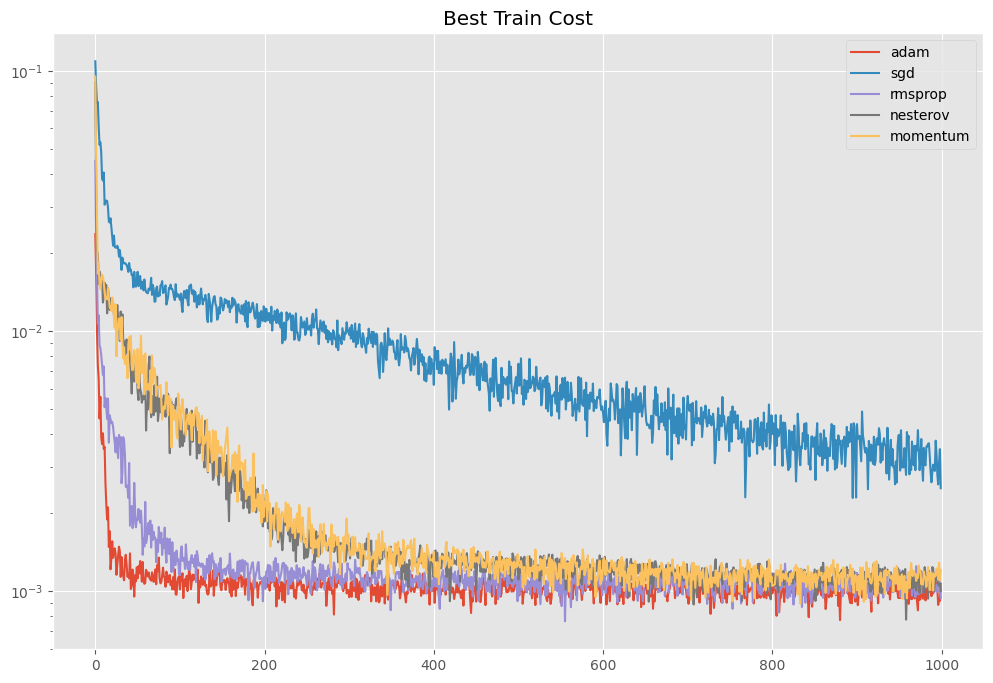

In [13]:
plt.yscale("log")

plt.title("Best Train Cost")

plt.plot(min_max_dict["adam"]["TrainCost"]["amin"], label="adam")
plt.plot(min_max_dict["sgd"]["TrainCost"]["amin"], label="sgd")
plt.plot(min_max_dict["rmsprop"]["TrainCost"]["amin"], label="rmsprop")
plt.plot(min_max_dict["nesterov"]["TrainCost"]["amin"], label="nesterov")
plt.plot(min_max_dict["momentum"]["TrainCost"]["amin"], label="momentum")

plt.legend();

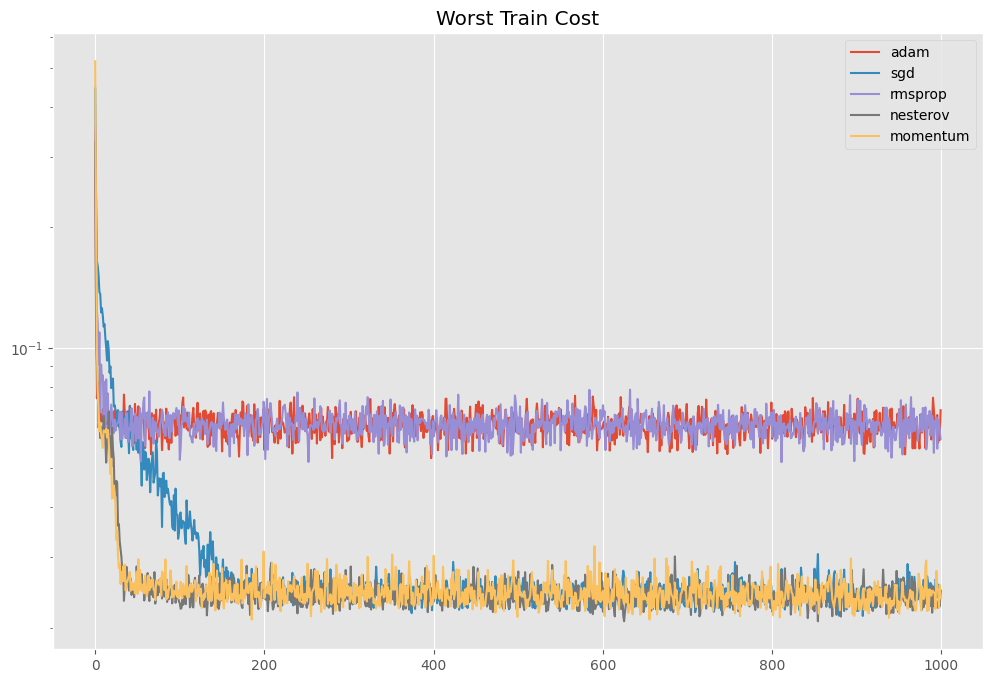

In [14]:
plt.yscale("log")

plt.title("Worst Train Cost")

plt.plot(min_max_dict["adam"]["TrainCost"]["amax"], label="adam")
plt.plot(min_max_dict["sgd"]["TrainCost"]["amax"], label="sgd")
plt.plot(min_max_dict["rmsprop"]["TrainCost"]["amax"], label="rmsprop")
plt.plot(min_max_dict["nesterov"]["TrainCost"]["amax"], label="nesterov")
plt.plot(min_max_dict["momentum"]["TrainCost"]["amax"], label="momentum")

plt.legend();